In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

In [56]:
frame = cv.imread("./video1/frame375.jpg", cv.IMREAD_COLOR)

In [3]:
cv.imshow("frame", frame)
cv.waitKey(0)
cv.destroyAllWindows()

In [65]:
frameRecortado = frame[330:850, 630:1200]

In [84]:
cv.imshow("frame", frameRecortado)
cv.waitKey(0)
cv.destroyAllWindows()

In [67]:
frameRecortado.shape

(520, 570, 3)

In [68]:
frameRecortadoBN = cv.cvtColor(frameRecortado, cv.COLOR_BGR2GRAY)

In [77]:
cv.imshow("frame", frameRecortadoBN)
cv.waitKey(0)
cv.destroyAllWindows()

In [70]:
frameRecortadoBN.shape

(520, 570)

In [90]:
frameRecortadoBN

array([[254, 254, 253, ..., 146, 146, 146],
       [254, 254, 253, ..., 148, 148, 148],
       [254, 254, 254, ..., 150, 150, 150],
       ...,
       [202, 202, 201, ..., 193, 194, 194],
       [200, 201, 200, ..., 193, 193, 193],
       [201, 201, 203, ..., 194, 194, 194]], dtype=uint8)

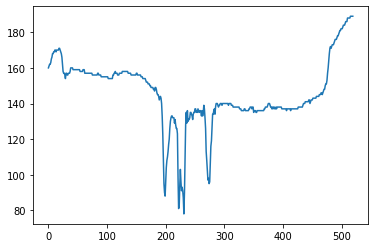

In [99]:
plt.plot(frameRecortadoBN[:,285])
plt.show()

In [28]:
frameRecortadoBN[:,285]

NameError: name 'frameRecortadoBN' is not defined

In [116]:
frameRecortado1 = frame[350:810, 600:1200]
#aproximadamente 160 frames de radio 810-350

In [117]:
cv.imshow("frame", frameRecortado1)
cv.waitKey(0)
cv.destroyAllWindows()

In [1]:
def intensidadRegion(nombreVideo, imagenInicial, imagenFinal):
    cantidadImagenes = imagenFinal-imagenInicial
    # El primer arreglo sera de ceros, este es par aguardar todos los perfiles de itnensidades
    intensidadesTodosFrames = np.zeros(520)
    for i in range(imagenInicial, imagenFinal):
        # Se carga el frame
        frame = cv.imread("./%s/frame%d.jpg" % (nombreVideo, i), 0)
        # Se recorta el frame
        frame = np.array(frame[330:850, 630:1200])
        # Se crea arreglo dummy para guardar el perfil de intensidad de cada frame en cada iteracion
        intensidades = frame[:,285]
        # Se stackea el arreglo dummy en uno que guardara todos los  perfiles de intensidades
        intensidadesTodosFrames = np.vstack([intensidadesTodosFrames, intensidades])
    # Se elimina el primer arreglo de ceros, y se devuelve un arreglo con todos los perfiles de itnensidades
    tiempo = np.linspace(0, cantidadImagenes/30, cantidadImagenes)
    return intensidadesTodosFrames[1:,:], tiempo

In [3]:
perfilesIntensidades, t = intensidadRegion("video1", 300, 450)

In [6]:
perfilesIntensidades

array([[158., 159., 162., ..., 184., 184., 185.],
       [158., 160., 162., ..., 184., 184., 185.],
       [159., 160., 162., ..., 184., 184., 185.],
       ...,
       [159., 159., 160., ..., 188., 188., 188.],
       [160., 160., 160., ..., 188., 188., 188.],
       [159., 160., 161., ..., 188., 188., 188.]])

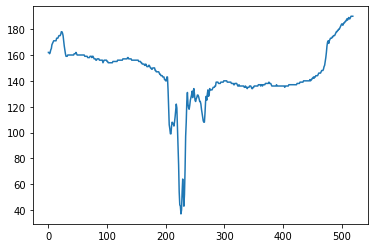

In [4]:
plt.plot(perfilesIntensidades[49])
plt.show()



In [5]:
arregloDiametros = np.array([])
for perfilIntensidad in perfilesIntensidades:
    numeroFrames = 0
    for intensidad in perfilIntensidad:
        # hay que hacer un condicional sobre cada intensidad, establecer un threshold, y guardar el numero de frames cuya intensidad  menores a ese threshold, a ojo el threshold que establece esta entre 150 y 160
        if(intensidad<=160):
            numeroFrames = numeroFrames + 1

    arregloDiametros = np.append(arregloDiametros, numeroFrames)
    arregloRadios = arregloDiametros/2
    arregloRadiosMetros = arregloRadios * 0.15 / 743  #factor de conversion

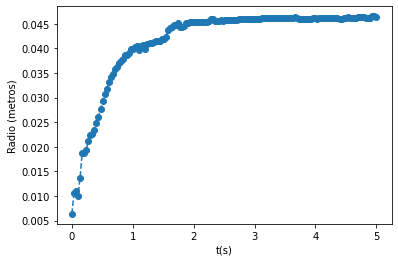

In [6]:
plt.plot(t, arregloRadiosMetros, 'o--')
plt.xlabel('t(s)')
plt.ylabel('Radio (metros)')
plt.show()

In [27]:
arregloRadiosMetros[0:31]

array([0.6359354 , 1.05989233, 1.10026918, 1.00942127, 1.37281292,
       1.86742934, 1.86742934, 1.93808883, 2.10969044, 2.230821  ,
       2.26110363, 2.34185734, 2.48317631, 2.61440108, 2.77590848,
       2.92732167, 3.07873486, 3.16958277, 3.31090175, 3.41184388,
       3.48250336, 3.57335128, 3.62382234, 3.69448183, 3.74495289,
       3.77523553, 3.85598923, 3.85598923, 3.91655451, 3.987214  ,
       3.99730821])

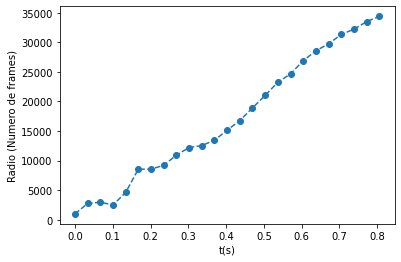

In [12]:
plt.plot(t[0:25], arregloRadios[0:25]**2, 'o--')
plt.xlabel('t(s)')
plt.ylabel('Radio (Numero de frames)')
plt.show()

In [13]:
data = np.array([arregloRadiosMetros,arregloRadios, t]).T
df = pd.DataFrame(data, columns=['radios(metros)','radios(pixeles)', 'tiempo'])

In [14]:
df.to_csv("video1.csv")

In [15]:
df

,radios(centimetros),radios(pixeles),tiempo
0,0.006359,31.5,0.000000
1,0.010599,52.5,0.033557
2,0.011003,54.5,0.067114
3,0.010094,50.0,0.100671
4,0.013728,68.0,0.134228
...,...,...,...
145,0.046131,228.5,4.865772
146,0.046231,229.0,4.899329
147,0.046534,230.5,4.932886
148,0.046534,230.5,4.966443


In [331]:
frame = cv.imread("./video1/frame300.jpg", 0)
frameRecortado = frame[330:850, 630:1200]
cv.circle(frameRecortado,(285,240), int(arregloRadios[0]),(255,0,255),1)
cv.line(frameRecortado,(285,0),(285,570), (255, 0,255), 1)
cv.imshow('imagen',frameRecortado)
cv.waitKey(0)
cv.destroyAllWindows()